# Part 2. EDA and Inferential Stats

This section contains analysis on the raw data: 

Target variable: data points of daily changes in stock price of six selected companies, which corresponds to the six influential business leaders
Features: raw tweets pulled from Tweeter.com from the business leaders
1. Elon Musk TSLA
2. Levie BOX
3. Jack TWTR
4. Benioff CRM
5. Richardbranson SPCE
6. JohnLegere TMUS

Purpose: 
1. To extract and clean stock and Tweeter data for model development preparation 
2. To determine features with significant relationship to the target variable (changes in stock price) 

In [7]:
from utils import *

In [8]:
plt.style.use('fivethirtyeight')

In [9]:
tweet_stocks = pd.read_pickle('./data/tweet_stocks.pkl')

The following table provides a description of the raw data. Here we can get basic statistics of the data and verify that data was pulled correctly. I also checked to ensure no duplicates were identified. 

In [10]:
#report = tweet_stocks.set_index('date').profile_report()
#report.to_file(output_file="./figures/eda/tweet_stocks_report.html")

In [11]:
tweet_stocks.reset_index(inplace=True, drop=True)

In [12]:
tweet_stocks.describe()

,mentions,hashtags,video,photos,urls,number of tweets,price,percent change
count,7356.000000,7356.000000,7356.000000,7356.000000,7356.000000,7356.000000,7356.000000,7356.000000
mean,2.279364,1.801659,2.098559,2.164492,2.368407,4.552474,79.504162,0.000874
std,3.685327,3.910863,3.057161,3.343693,2.915059,5.148280,100.145913,0.020556
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.190000,-0.178809
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.500000,-0.004451
50%,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000,61.483999,0.000579
75%,3.000000,2.000000,3.000000,3.000000,3.000000,6.000000,90.342497,0.006489
max,66.000000,48.000000,36.000000,33.000000,27.000000,55.000000,891.380005,0.269045


In [13]:
tweet_stocks.duplicated(keep=False).any()

False

In [14]:
tweet_stocks.T.duplicated(keep=False)

date                False
tweet               False
username            False
mentions            False
hashtags            False
video               False
photos              False
urls                False
number of tweets    False
price               False
percent change      False
dtype: bool

Here we examine several business leaders / investors corresponding to different stock prices. For example, Tweets from Elon Musk is examined for impact against Tesla stock price changes. 

Note this model can be flexible to examine the relationship between any business leader and the corresponding stock value. Here we selected six study cases, since we expect each case to have unique characteristics or relationships. We also want to examine the combined impact on all six stock - think of it as a small portfolio. Although at this stage, the code and model was designed to analysis the impact of sentiment based on these six companies, it can be made flexible enough to support any companies or a mix of companies to construct a portfolio. 

The table below shows the number of data points associated with each of the six study cases. From the data count, we can identify that certain features with small data count, such as hastags for Levie, may not yield reliable test results. This will be useful in the later stage when we infer information from statistical testing. 

# CEO Features

In [15]:
tweet_stocks.columns

Index(['date', 'tweet', 'username', 'mentions', 'hashtags', 'video', 'photos',
       'urls', 'number of tweets', 'price', 'percent change'],
      dtype='object')

In [16]:
features = list(tweet_stocks.drop(labels = ['date', 'tweet', 'username', 'price', 'percent change'], axis=1))

In [17]:
ceos_sum = tweet_stocks.groupby('username').sum()
ceos_mean = tweet_stocks.groupby('username').mean()
ceos_std = tweet_stocks.groupby('username').std()

In [18]:
username_list = list(tweet_stocks['username'].unique())
username_list.sort()

In [19]:
color_list = ['purple', 'teal', 'orange', 'blue', 'green', 'red']
stocks_list = ['CRM', 'TMUS', 'TSLA', 'TWTR', 'BOX', 'SPCE']

mapper = list(zip(username_list, stocks_list, color_list))

In [20]:
for user_stock_color in mapper:
    print(user_stock_color)

('Benioff', 'CRM', 'purple')
('JohnLegere', 'TMUS', 'teal')
('elonmusk', 'TSLA', 'orange')
('jack', 'TWTR', 'blue')
('levie', 'BOX', 'green')
('richardbranson', 'SPCE', 'red')


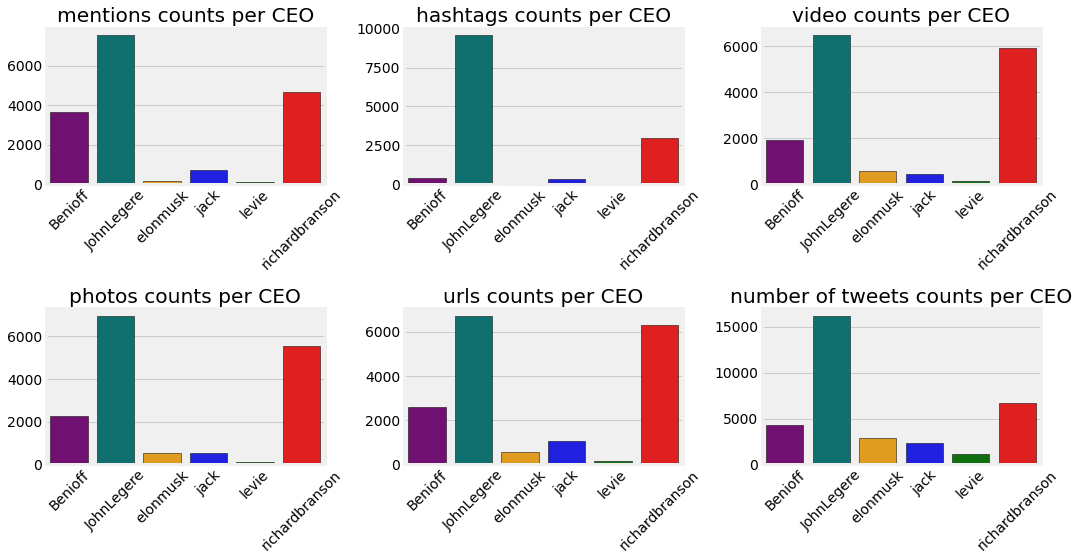

In [21]:
fig, axs = plt.subplots(2,3, figsize=(15, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for i in range(6):
    sns.barplot(x = ceos_sum.index, y=ceos_sum[features[i]], palette = color_list, edgecolor='black',ax = axs[i])
    axs[i].set_title('{} counts per CEO'.format(features[i]))
    axs[i].set_xticklabels(labels=ceos_sum.index, Rotation=45)
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")
    plt.savefig('./figures/eda/{}_counts_ceo.png'.format(features[i]), bbox_inches='tight', transparent=True)
plt.tight_layout()
plt.show()

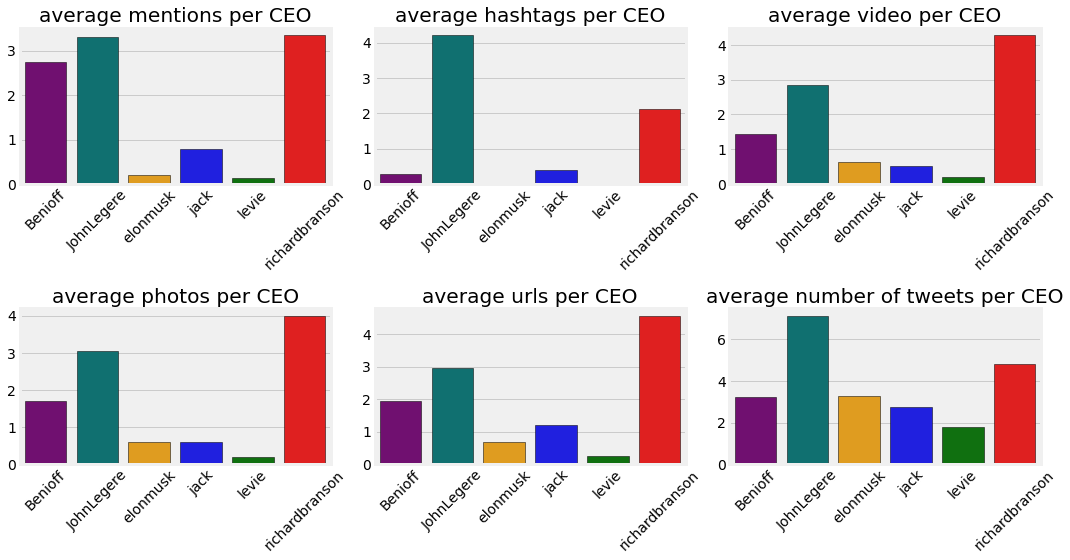

In [22]:
fig, axs = plt.subplots(2,3, figsize=(15, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for i in range(6):
    sns.barplot(x = ceos_mean.index, y=ceos_mean[features[i]], palette = color_list, edgecolor='black',ax = axs[i])
    axs[i].set_title('average {} per CEO'.format(features[i]))
    axs[i].set_xticklabels(labels=ceos_mean.index, Rotation=45)
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")
    plt.savefig('./figures/eda/{}_mean_ceo.png'.format(features[i]), bbox_inches='tight', transparent=True)
plt.tight_layout()
plt.show()

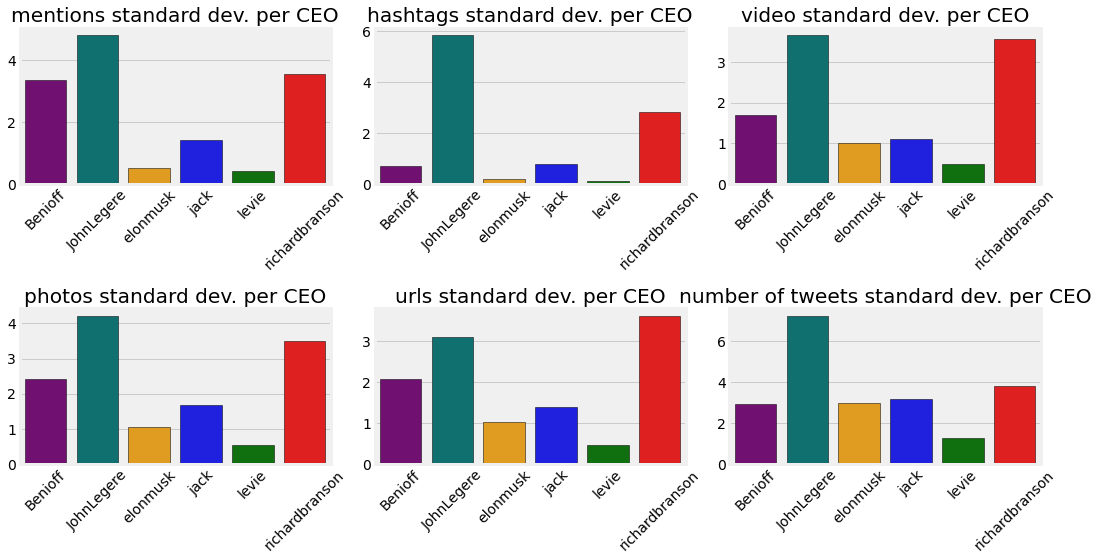

In [23]:
fig, axs = plt.subplots(2,3, figsize=(15, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for i in range(6):
    sns.barplot(x = ceos_std.index, y=ceos_std[features[i]], palette = color_list, edgecolor='black',ax = axs[i])
    axs[i].set_title('{} standard dev. per CEO'.format(features[i]))
    axs[i].set_xticklabels(labels=ceos_mean.index, Rotation=45)
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")
    plt.savefig('./figures/eda/{}_std_ceo.png'.format(features[i]), bbox_inches='tight', transparent=True)
plt.tight_layout()
plt.show()

Similarly, the table below shows the mean of the data for each study case. At this stage, this is also useful for sense checking data values to ensure that development data was loaded correctly. 

# Distributions<a id='2.2_Data_Distributions'></a>

In this section we examine the distribution of the stock price changes. The purpose is to identify the appropriate distribution for statistical testing. 

Here I first defined functions that can make data visualization more efficient. 

The following table illustrates the development data. For example, Tweets from Elon Musk is reduced to several features, such as number of mentions, and corresponding to the value and percent change in the corresponding stock price.  

Before we proceed to the distribution analysis, we need to process the raw stock data to extract information.  Given stock price have daily volatility, here we begin to define what is a significant increase or decrease in stock value vs. noise (or normal day-to-day volaility), so that we can better observe the correlation between stock price changes and social media sentiment. 

Key assumption: 1 standard deviation is used to determine whether a change is signficant vs. noise. 

In [24]:
features = ['mentions', 'hashtags', 'video', 'photos', 'urls', 'number of tweets']

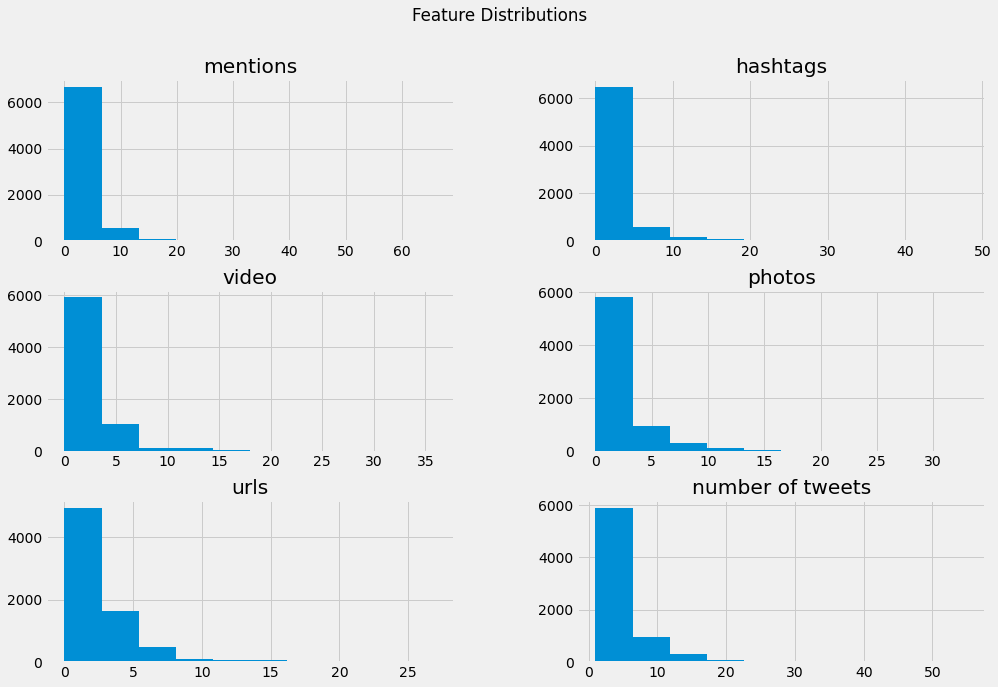

In [25]:
tweet_stocks[features].hist(figsize=(15,10))
plt.suptitle('Feature Distributions')
plt.show()

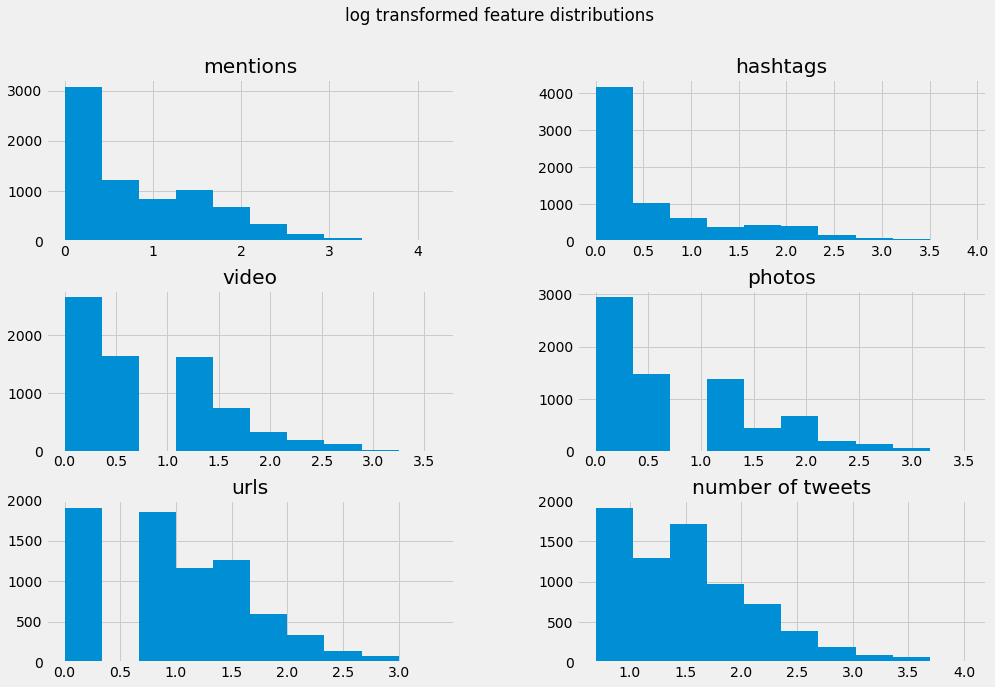

In [26]:
log_features = tweet_stocks[features].copy(deep=True)

log_features += 1
log_features = np.log(log_features)
log_features.hist(figsize=(15,10))
plt.suptitle("log transformed feature distributions")

plt.show()


In [27]:
tweet_stocks[features] = log_features

In [28]:
# Bin percent change into 'fall' (<-1SD), 'no change' (btwn -1SD and 1SD), and 'rise' (>1SD)
new_df = pd.DataFrame()
for user in username_list:
    df = tweet_stocks[tweet_stocks['username'] == user]
    bins = [df['percent change'].min(), -0.025, 0.025, df['percent change'].max()]
    df['bins'] = pd.cut(df['percent change'], bins=bins, labels=['move', 'stay', 'move'], include_lowest=True, ordered=False)
    new_df = new_df.append(df)
    new_df.reset_index(inplace=True, drop=True)
tweet_stocks = new_df    

In [29]:
len(tweet_stocks)

7356

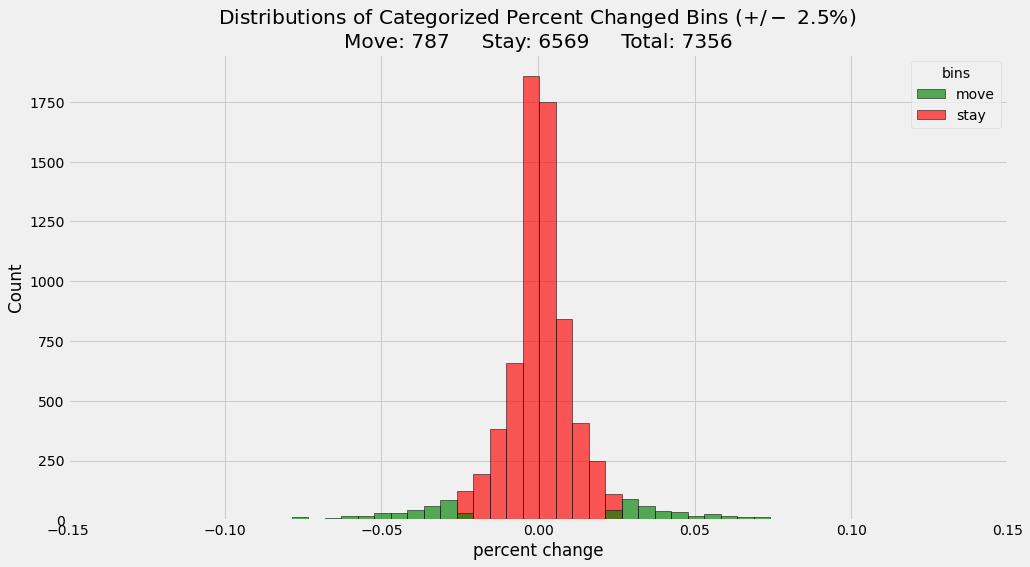

In [30]:
df = tweet_stocks.copy(deep=True)
plt.figure(figsize=(15,8))
_ = sns.histplot(data = df, x='percent change', hue='bins', bins=int(np.sqrt(len(df))), palette=['green', 'red'], alpha=0.65, edgecolor='black')
plt.title('Distributions of Categorized Percent Changed Bins ($+/-$ 2.5%) \nMove: {}     Stay: {}     Total: {}'.format(len(df[df['bins']=='move']), len(df[df['bins']=='stay']), len(df)))
plt.xlim(-0.15, .15)
plt.savefig('./figures/eda/pct_distribution.png', bbox_inches='tight', transparent=True)
plt.show()

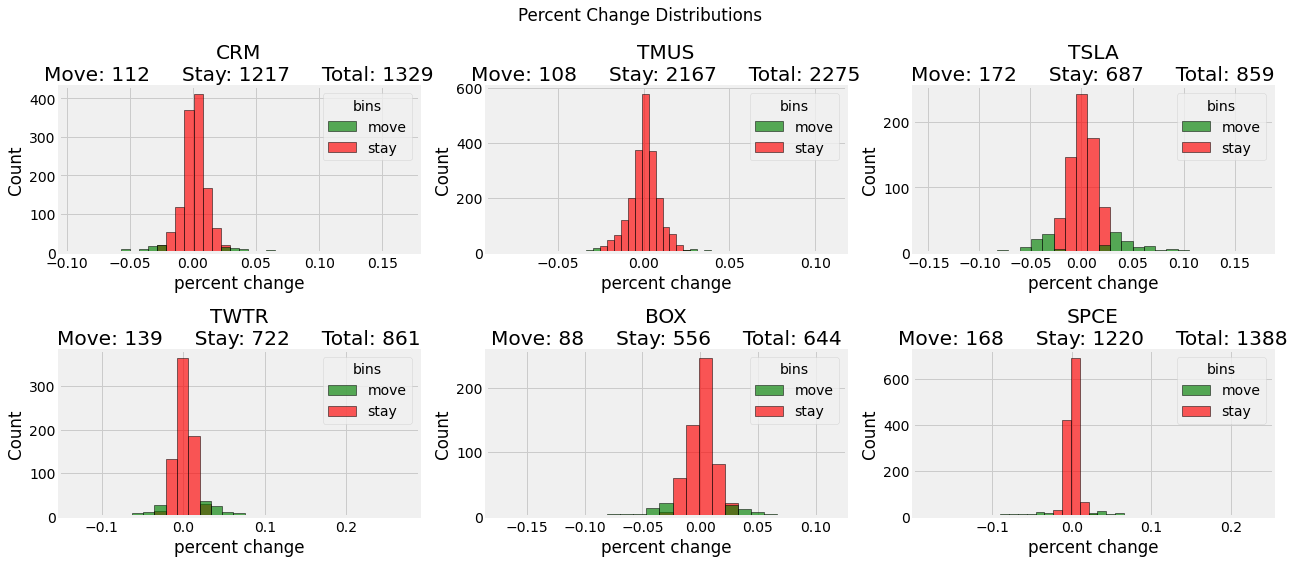

In [31]:
fig, axs = plt.subplots(2,3, figsize=(18, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for i in range(6):
    plt.suptitle('Percent Change Distributions')
    df = tweet_stocks[tweet_stocks['username'] == mapper[i][0]].copy(deep=True)
    sns.histplot(data = df, x='percent change', hue='bins', bins=int(np.sqrt(len(df))), palette=['green','red'], alpha=0.65, edgecolor='black',ax = axs[i])
    axs[i].set_title('{}\nMove: {}     Stay: {}     Total: {}'.format(mapper[i][1], len(df[df['bins']=='move']), len(df[df['bins']=='stay']), len(df)))
    #axs[i].set_xticklabels(labels=ceos_sum.index, Rotation=45)
    plt.savefig('./figures/eda/{}_pct_change_dist.png'.format(mapper[i][0], bbox_inches='tight', transparent=True))
plt.tight_layout()
plt.show()

In [32]:
X = tweet_stocks[features]
features_list = X.columns
y = tweet_stocks['bins']
clf = RandomForestClassifier(n_jobs=-1)
model = clf.fit(X, y)
permutation_importance = most_important_features(model, X, y, features_list, stds=2.0)

Important Features:

         number of tweets 0.039 +/- 0.002
                 mentions 0.035 +/- 0.001
                   photos 0.031 +/- 0.001
                    video 0.030 +/- 0.002
                     urls 0.030 +/- 0.001
                 hashtags 0.028 +/- 0.001


The charts and tables below show the distribution of the stock prices changes, which is the target variable. Here we examined six study cases individually as well as the overall portfolio with all six selected cases. The distribution appears to resemble a normal distribution. We do not see significant skewness. This is useful for determine statistical tests suitable for the population. 

In [33]:
feature_importance = pd.DataFrame(columns = ['mean', 'std'], index=features_list)
feature_importance['mean'] = permutation_importance['importances_mean']
feature_importance['std'] = permutation_importance['importances_std']
feature_importance.sort_values(by='mean', ascending=False, inplace=True)

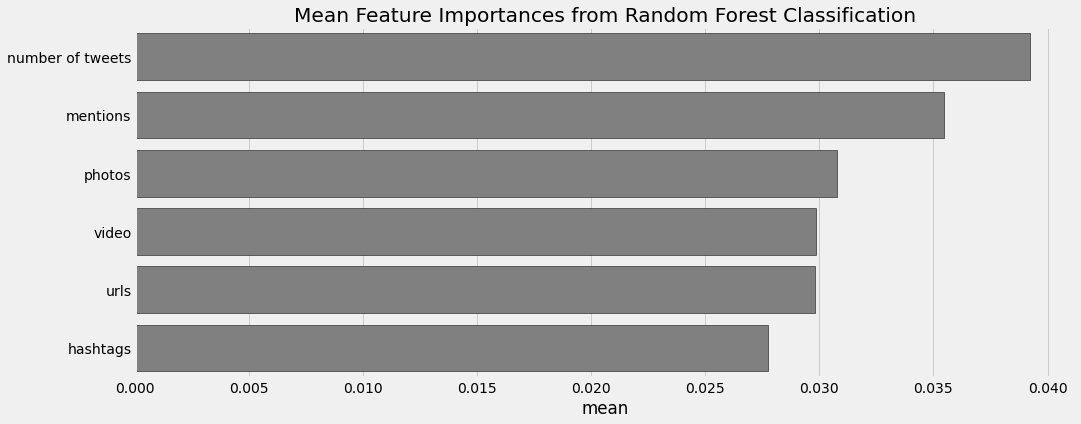

In [34]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'mean', y=feature_importance.index, data=feature_importance, ci='std', color='grey', edgecolor='black')
plt.title('Mean Feature Importances from Random Forest Classification')
plt.savefig('./figures/eda/feature_importance_bar.png', bbox_inches='tight', transparent=True)
plt.show()

BENIOFF
Important Features:

                     urls 0.050 +/- 0.004
                 mentions 0.044 +/- 0.003
         number of tweets 0.043 +/- 0.004
                   photos 0.038 +/- 0.002
                    video 0.026 +/- 0.002
                 hashtags 0.018 +/- 0.002
JOHNLEGERE
Important Features:

                 mentions 0.025 +/- 0.002
         number of tweets 0.025 +/- 0.001
                 hashtags 0.024 +/- 0.001
                   photos 0.024 +/- 0.002
                    video 0.023 +/- 0.001
                     urls 0.022 +/- 0.002
ELONMUSK
Important Features:

         number of tweets 0.087 +/- 0.009
                     urls 0.048 +/- 0.006
                   photos 0.046 +/- 0.005
                    video 0.044 +/- 0.007
                 mentions 0.038 +/- 0.007
                 hashtags 0.003 +/- 0.001
JACK
Important Features:

         number of tweets 0.064 +/- 0.007
                     urls 0.046 +/- 0.006
                 mentions 0.041 +/- 0.005
 

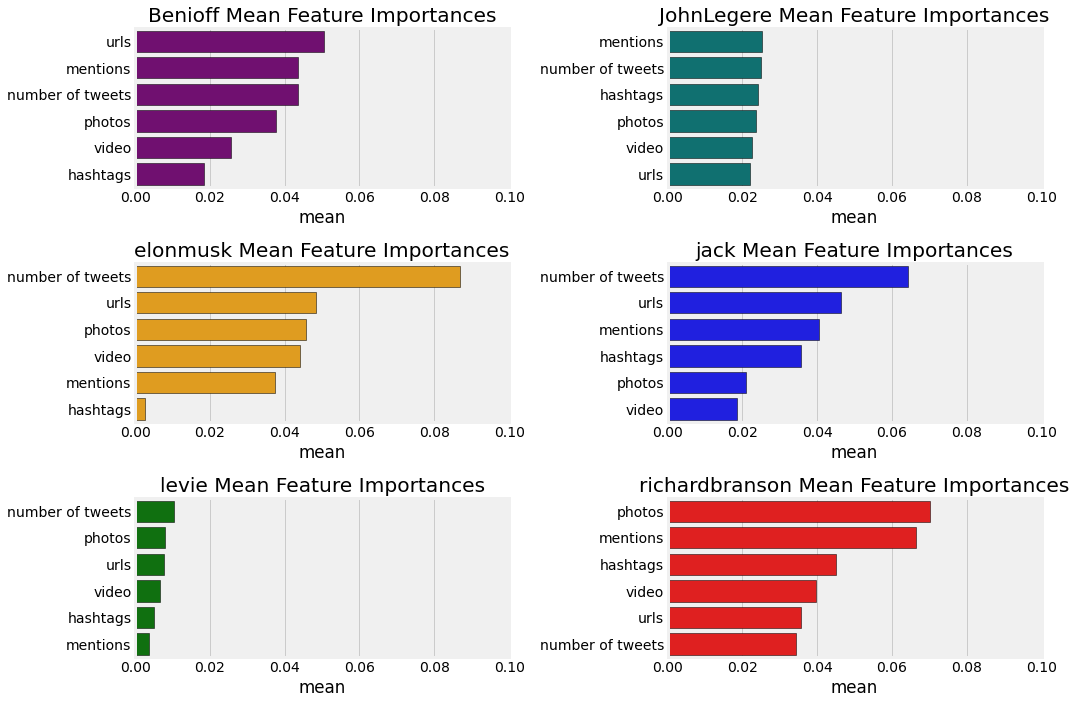

In [35]:
fig, axs = plt.subplots(3,2, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for i in range(6):
    df = tweet_stocks[tweet_stocks['username'] == mapper[i][0]].copy(deep=True)
    X = df[features]
    features_list = X.columns
    y = df['bins']
    clf = RandomForestClassifier(n_jobs=-1)
    model = clf.fit(X, y)
    print(mapper[i][0].upper())
    permutation_importance = most_important_features(model, X, y, features_list, stds=2.0)
    
    feature_importance = pd.DataFrame(columns = ['mean', 'std'], index=features_list)
    feature_importance['mean'] = permutation_importance['importances_mean']
    feature_importance['std'] = permutation_importance['importances_std']
    feature_importance.sort_values(by='mean', ascending=False, inplace=True)
    
    sns.barplot(x = 'mean', y=feature_importance.index, data=feature_importance, ci='std', ax=axs[i], color=mapper[i][2], edgecolor='k')
    axs[i].set_title('{} Mean Feature Importances'.format(mapper[i][0]))
    axs[i].set_xlim(0, 0.10)
    
    #plt.savefig('./figures/eda/feature_importance_bar.png', bbox_inches='tight', transparent=True)
    
plt.tight_layout()
plt.show()

Mean Decrease in Impurity (MDI)/ Gini performance for trees counts the number of times a feature is used to split a node, weighted by the number of samples it splits.

# WRITE SOME QUESTIONS YOU WANT TO ANSWER THROUGH EDA

1. Are any features correlated with the percent change?
2. Are there statistically significant differences within any of the features as they are binned?
3. What features have the greatest contribution to percent change?
4. What is a typical value?
5. What is the uncertainty for a typical value?
6. What is a good distributional fit for a set of numbers?

# Bivariate Analysis

How do the features differ in stocks that move vs stocks that don't?

# KDE Plots

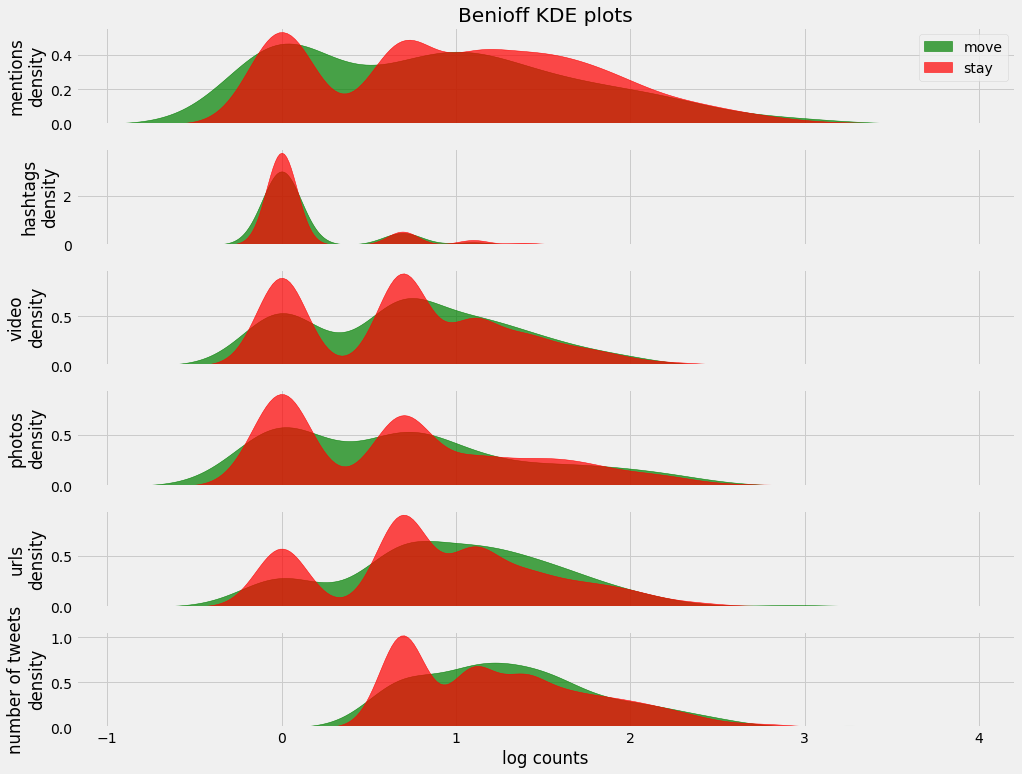

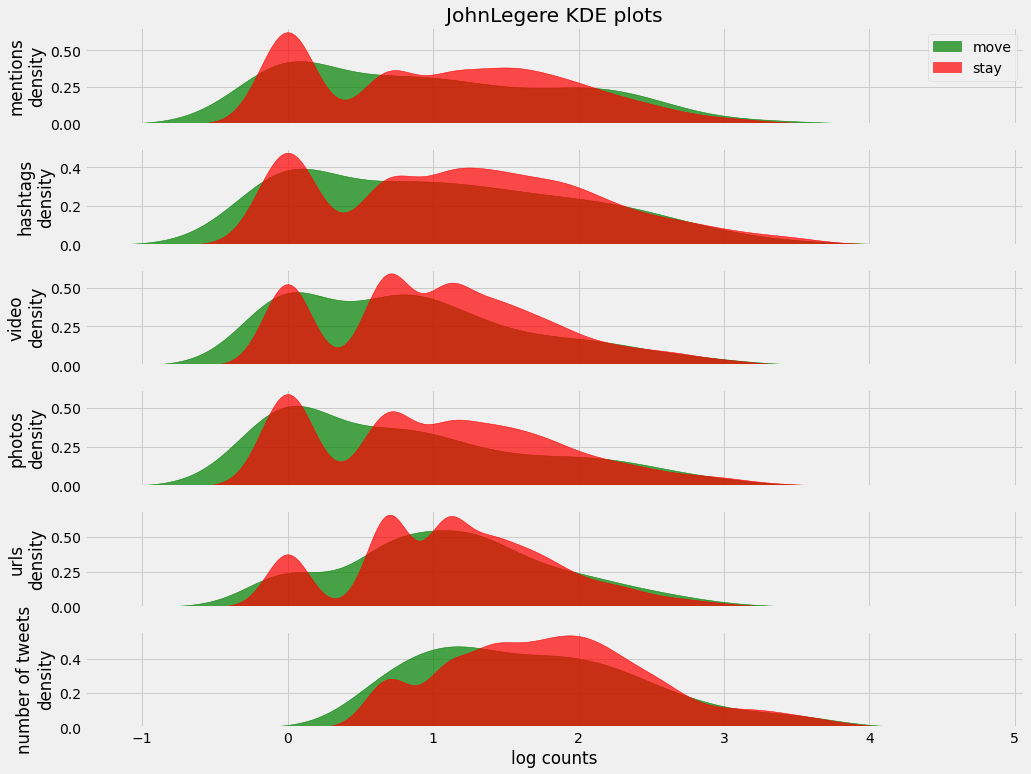

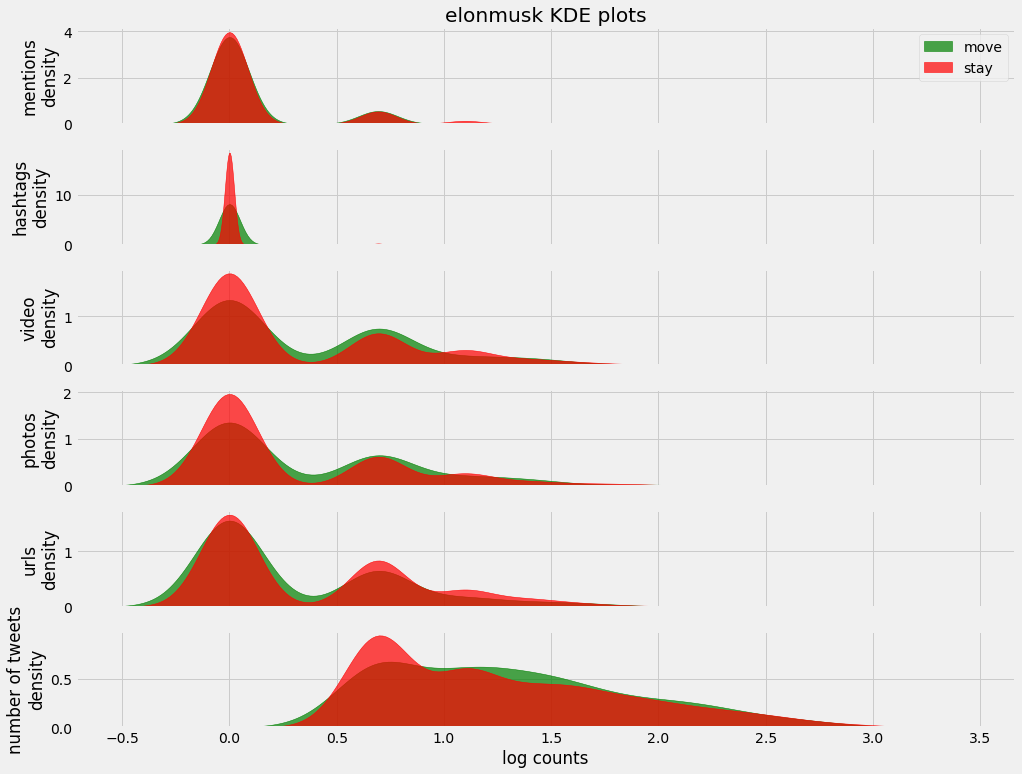

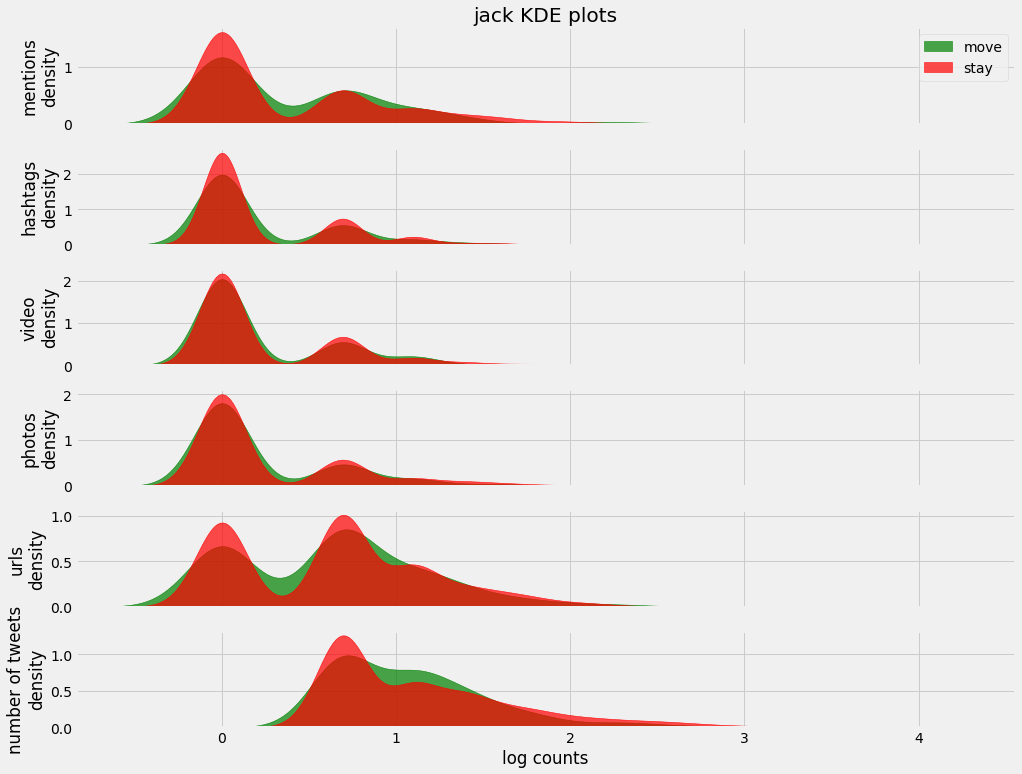

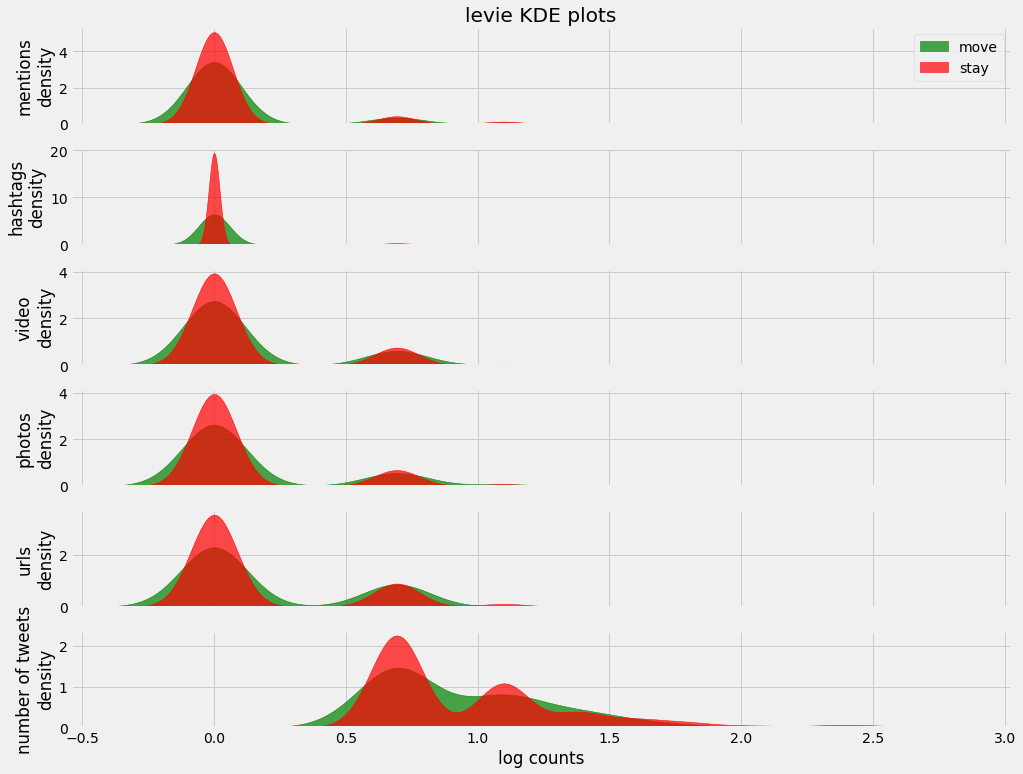

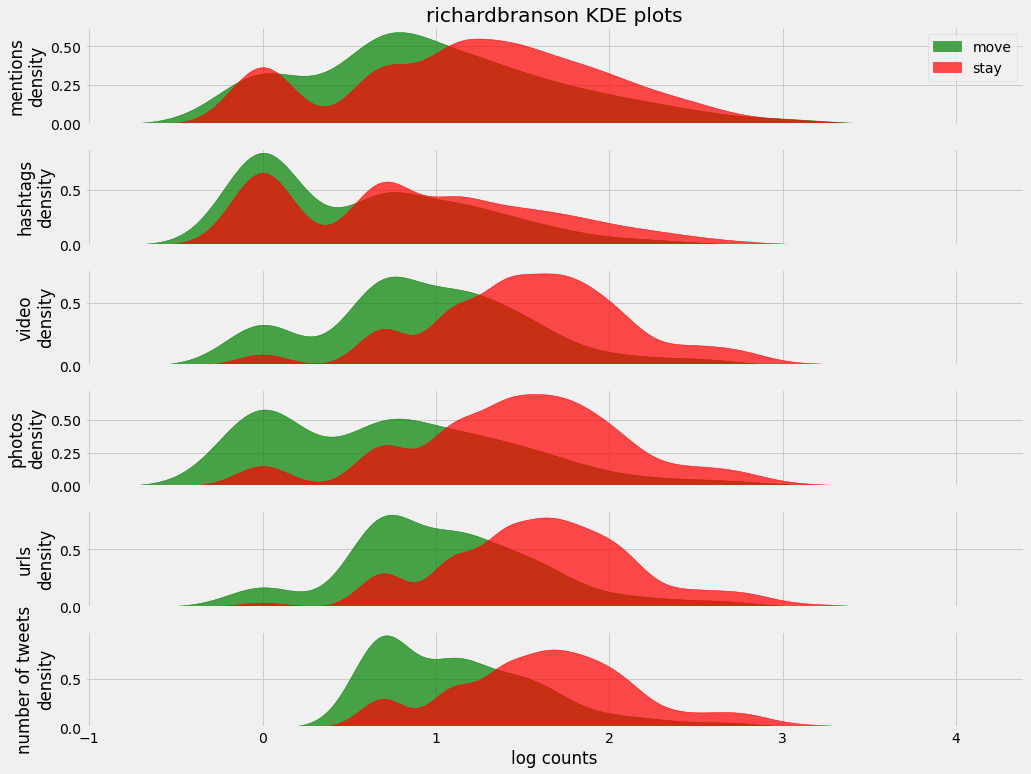

In [36]:
for user in tweet_stocks['username'].unique():
    fig, axs = plt.subplots(6, 1, sharex=True, figsize=(15,12))
    fig.subplots_adjust(hspace=0.25)
    i=0
    df_usn = tweet_stocks[tweet_stocks['username'] == user].copy(deep=True)
    while i < len(features):


        sns.kdeplot(df_usn[features[i]][df_usn['bins'] == 'move'], color='green' ,alpha=0.7, ax=axs[i], fill=True)
        sns.kdeplot(df_usn[features[i]][df_usn['bins'] == 'stay'], color='red', alpha=0.7, ax=axs[i], fill=True)
        axs[i].set_ylabel("{}\ndensity".format(features[i]))
        axs[5].set_xlabel('log counts')
        axs[0].set_title('{} KDE plots'.format(user))
        axs[0].legend(['move', 'stay'])

        i+=1
    plt.savefig('./figures/eda/{}_kde_plots.png'.format(user), bbox_inches='tight', transparent=True)
    plt.show()



# Violin Plots

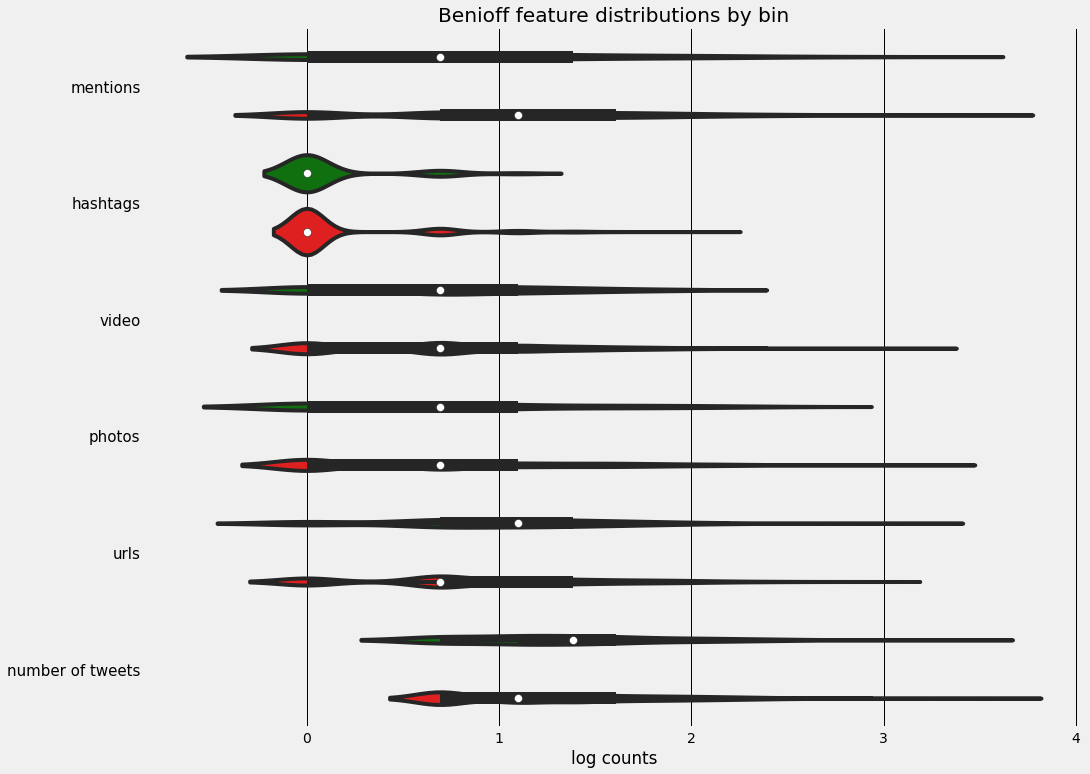

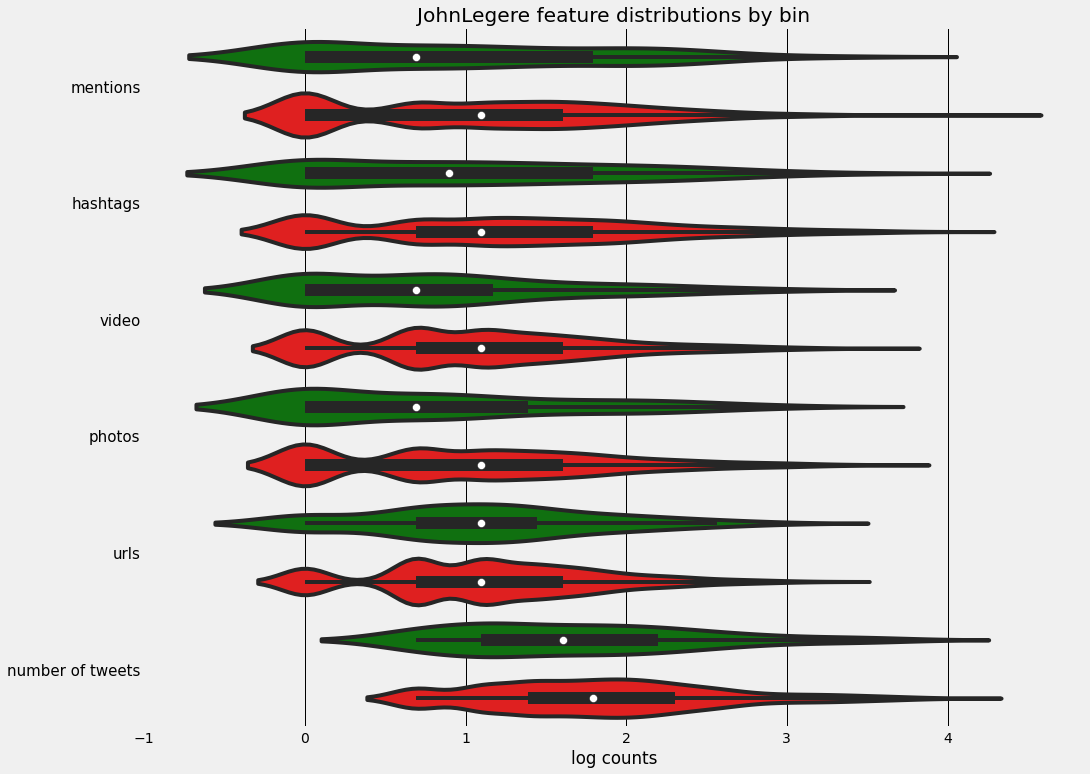

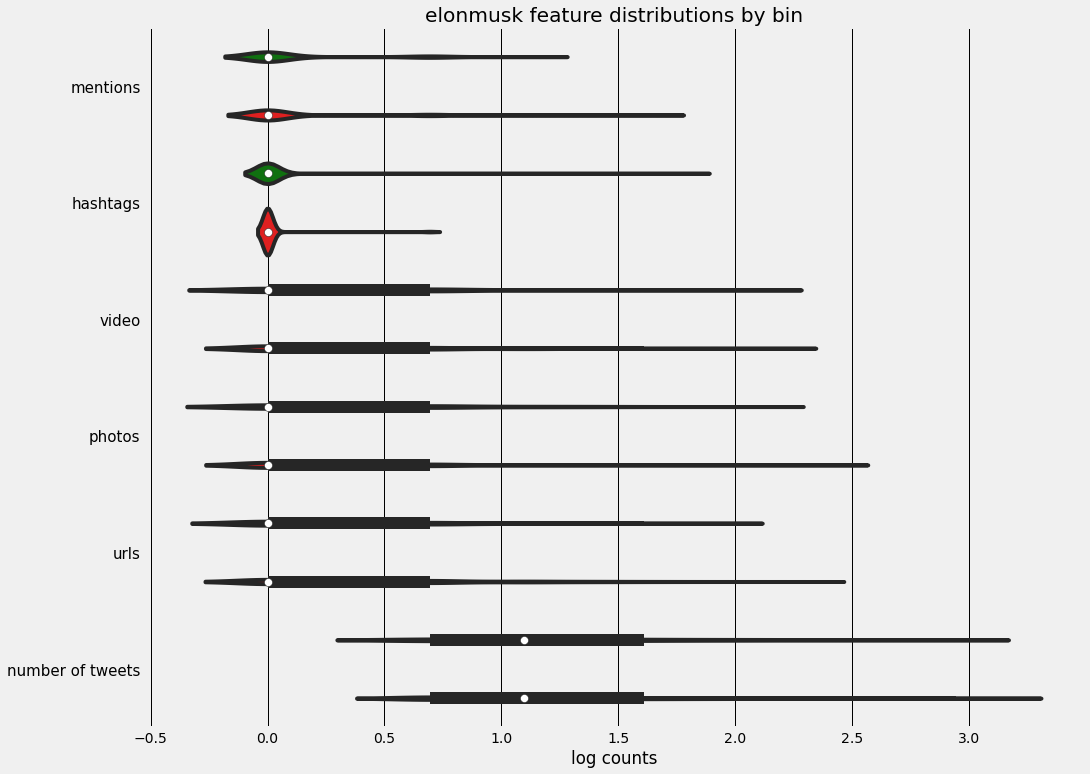

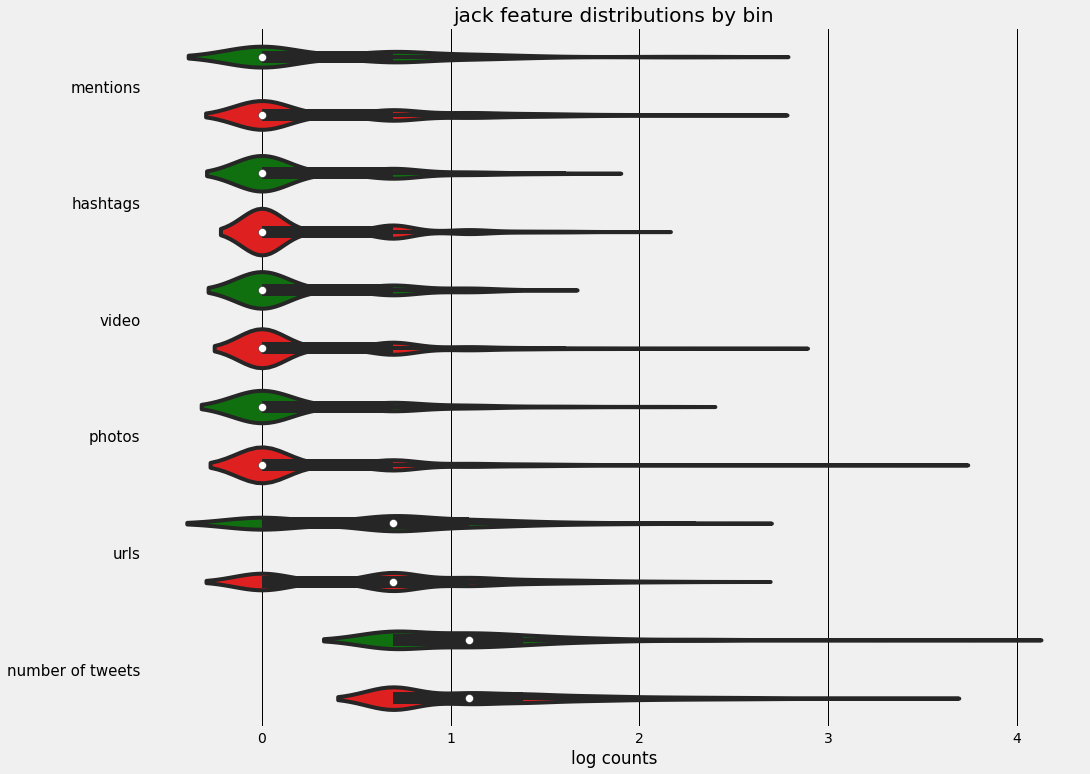

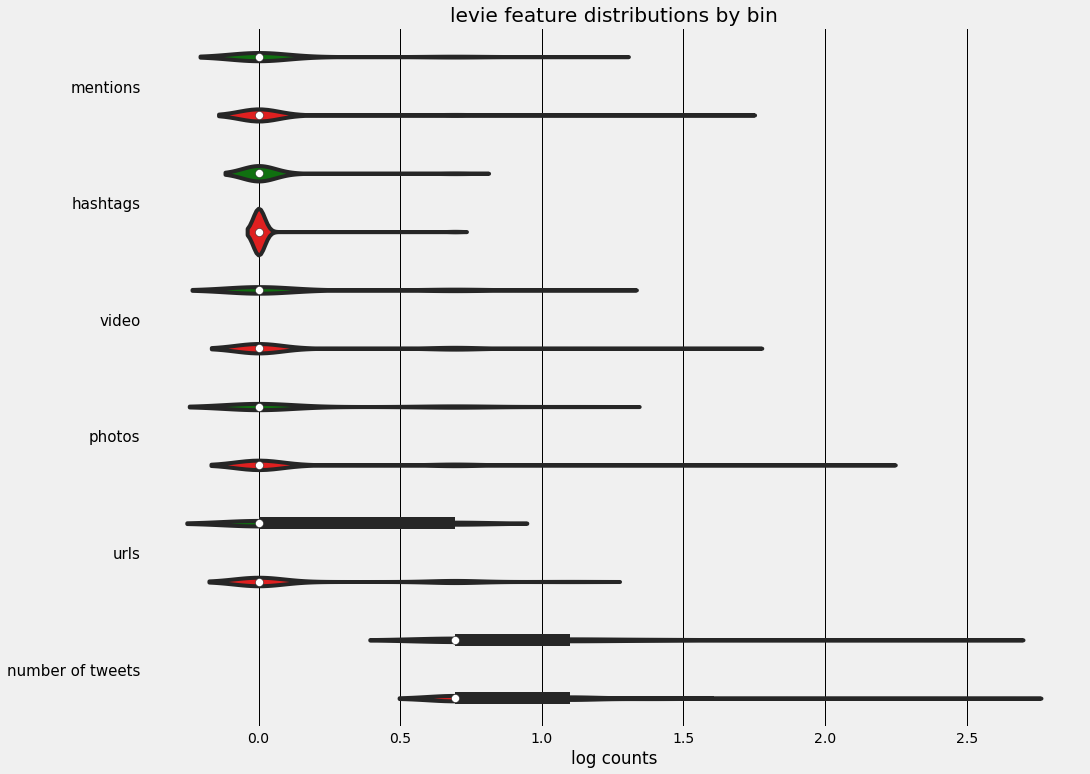

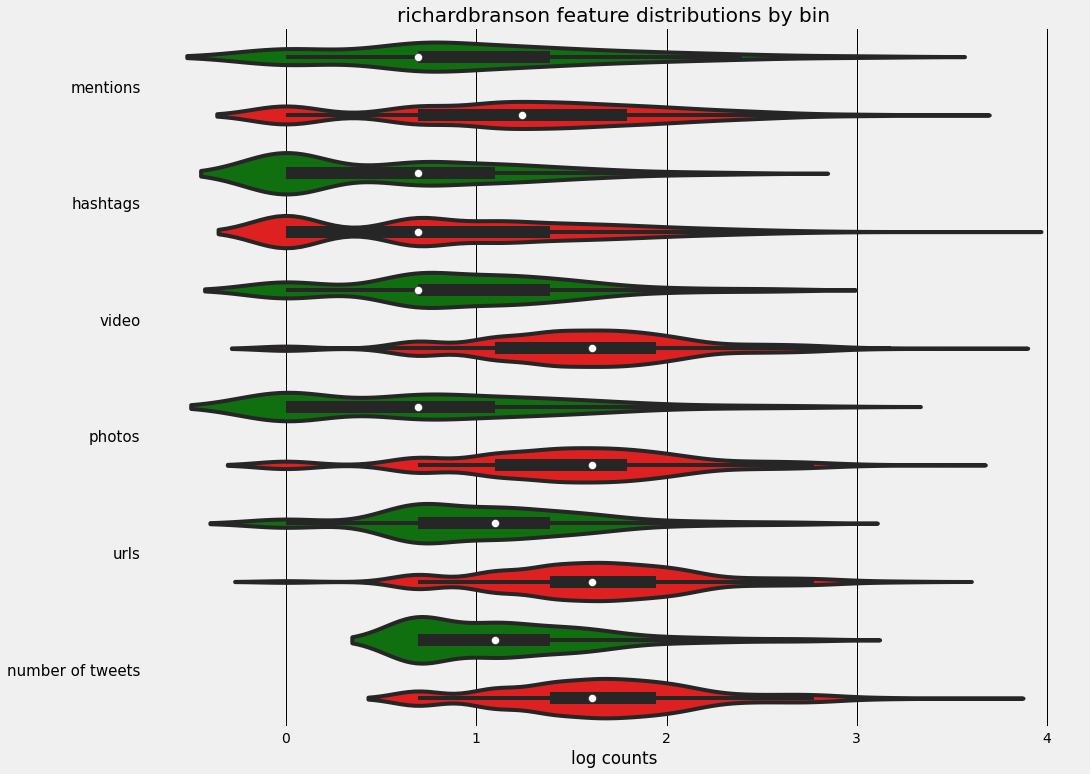

In [37]:
for user in tweet_stocks['username'].unique():
    df = tweet_stocks[tweet_stocks['username'] == user]
    move_df = [df[i][df['bins'] == 'move'] for i in features]
    stay_df = [df[i][df['bins'] == 'stay'] for i in features]
    i=0
    features_df = []
    while i < (len(move_df) + len(stay_df)):
        if i%2 == 0:
            features_df.append(move_df[i//2])
        else:
            features_df.append(stay_df[i//2])
        i += 1
    plt.figure(figsize=(15,12))
    sns.violinplot(data=features_df, palette=['green', 'red'], orient='h', labels=['stay', 'move'])
    plt.yticks(ticks=np.arange(0.5, 2*len(features)+.5, 2), labels=features)
    plt.title('{} feature distributions by bin'.format(user))
    plt.xlabel('log counts')
    plt.grid(True, color='black', axis='x')
    plt.yticks(size=15)

    #plt.savefig('./figures/eda/{}_violin_plots'.format(user), bbox_inches='tight', tranparent=True)
    plt.show()

# Significance Testing

In [38]:
full_t_tests = pd.DataFrame()
for user in tweet_stocks['username'].unique():  
    t_tests = pd.DataFrame()
    df_usn = tweet_stocks[tweet_stocks['username'] == user].copy(deep=True)
    for feature in features:
        move = df_usn[df_usn['bins']=='move'][feature]
        stay = df_usn[df_usn['bins']=='stay'][feature]
        move_mean = np.mean(move)
        stay_mean = np.mean(stay)
        move_std = np.std(move)
        stay_std = np.std(stay)
        ttest,pval = ttest_ind(stay, move)
        t_test = pd.DataFrame(columns=['username','feature','t_test_score', 'p_val','stay_mean', 'move_mean', 'stay_std','move_std'], index=[0])
        t_test['feature'] = feature
        t_test['username'] = user
        t_test['t_test_score'] = ttest
        t_test['p_val'] = pval
        t_test['move_mean'] = move_mean
        t_test['stay_mean'] = stay_mean
        t_test['move_std'] = move_std
        t_test['stay_std'] = stay_std
        t_tests = t_tests.append(t_test, ignore_index=True)
    full_t_tests = full_t_tests.append(t_tests, ignore_index=True)

In [39]:
sig_dif_t = full_t_tests[full_t_tests['p_val'] <=0.05].sort_values(by='t_test_score', ascending=False)

In [40]:
sig_dif_t

,username,feature,t_test_score,p_val,stay_mean,move_mean,stay_std,move_std
33,richardbranson,photos,13.680420,4.682228e-40,1.474136,0.748188,0.637088,0.694941
32,richardbranson,video,12.671292,6.770296e-35,1.545405,0.926481,0.593030,0.593780
34,richardbranson,urls,12.303891,4.294533e-33,1.609635,1.044876,0.557722,0.554848
35,richardbranson,number of tweets,11.479030,3.349665e-29,1.655442,1.149210,0.542493,0.481810
31,richardbranson,hashtags,5.326755,1.165429e-07,0.890062,0.572070,0.737870,0.622703
30,richardbranson,mentions,3.802095,1.497079e-04,1.218212,0.983726,0.752318,0.723560
8,JohnLegere,video,2.730189,6.378629e-03,1.044442,0.839333,0.760001,0.793876
9,JohnLegere,photos,2.616422,8.944516e-03,1.036631,0.821829,0.830872,0.860861
16,elonmusk,urls,1.979994,4.802372e-02,0.397995,0.315948,0.493396,0.452312
25,levie,hashtags,-2.451280,1.450041e-02,0.007480,0.031507,0.071616,0.144382


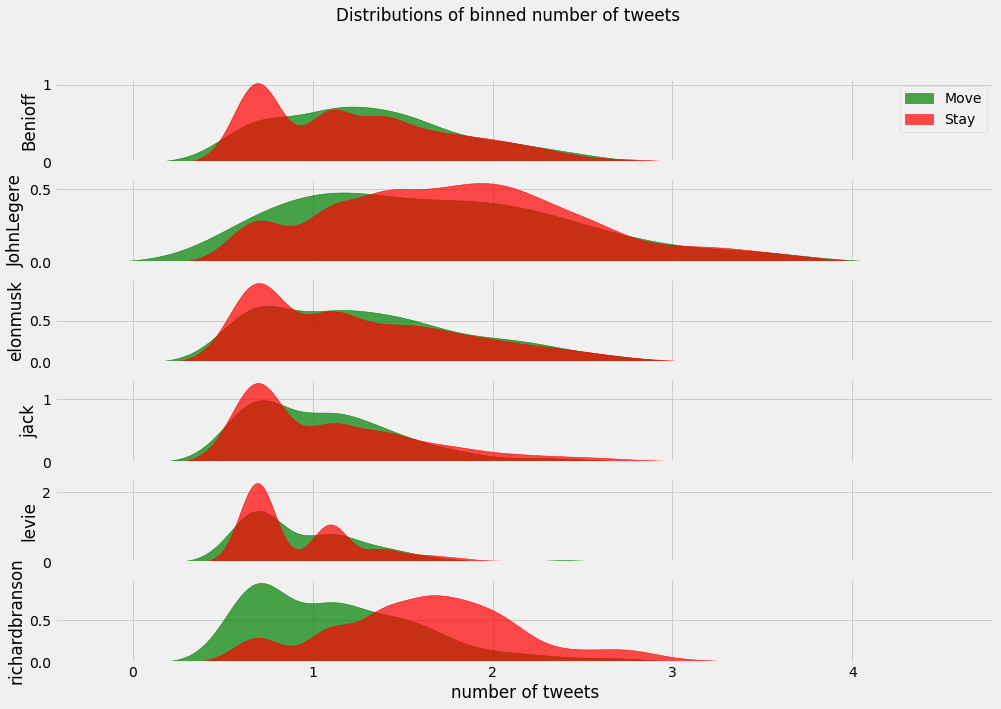

In [41]:
feature='number of tweets'
fig = plt.figure(figsize=(15,10))
gs = fig.add_gridspec(6, hspace=0.2)
axs = gs.subplots(sharex=True, sharey=False)
for i in range(6):
    df_usn = tweet_stocks[tweet_stocks['username'] == mapper[i][0]].copy(deep=True)
    fig.suptitle('Distributions of binned {}'.format(feature))
    sns.kdeplot(df_usn[feature][df_usn['bins'] == 'move'], color='green' ,alpha=0.7, fill=True, ax=axs[i])
    sns.kdeplot(df_usn[feature][df_usn['bins'] == 'stay'], color='red', alpha=0.7 , fill=True, ax=axs[i])
    axs[i].set_ylabel('{}'.format(mapper[i][0]))
    axs[0].legend(labels=['Move', 'Stay'])
    # Hide x labels and tick labels for all but bottom plot.
    for ax in axs:
        ax.label_outer()

In [43]:
sig_dif_t

,username,feature,t_test_score,p_val,stay_mean,move_mean,stay_std,move_std
33,richardbranson,photos,13.680420,4.682228e-40,1.474136,0.748188,0.637088,0.694941
32,richardbranson,video,12.671292,6.770296e-35,1.545405,0.926481,0.593030,0.593780
34,richardbranson,urls,12.303891,4.294533e-33,1.609635,1.044876,0.557722,0.554848
35,richardbranson,number of tweets,11.479030,3.349665e-29,1.655442,1.149210,0.542493,0.481810
31,richardbranson,hashtags,5.326755,1.165429e-07,0.890062,0.572070,0.737870,0.622703
30,richardbranson,mentions,3.802095,1.497079e-04,1.218212,0.983726,0.752318,0.723560
8,JohnLegere,video,2.730189,6.378629e-03,1.044442,0.839333,0.760001,0.793876
9,JohnLegere,photos,2.616422,8.944516e-03,1.036631,0.821829,0.830872,0.860861
16,elonmusk,urls,1.979994,4.802372e-02,0.397995,0.315948,0.493396,0.452312
25,levie,hashtags,-2.451280,1.450041e-02,0.007480,0.031507,0.071616,0.144382


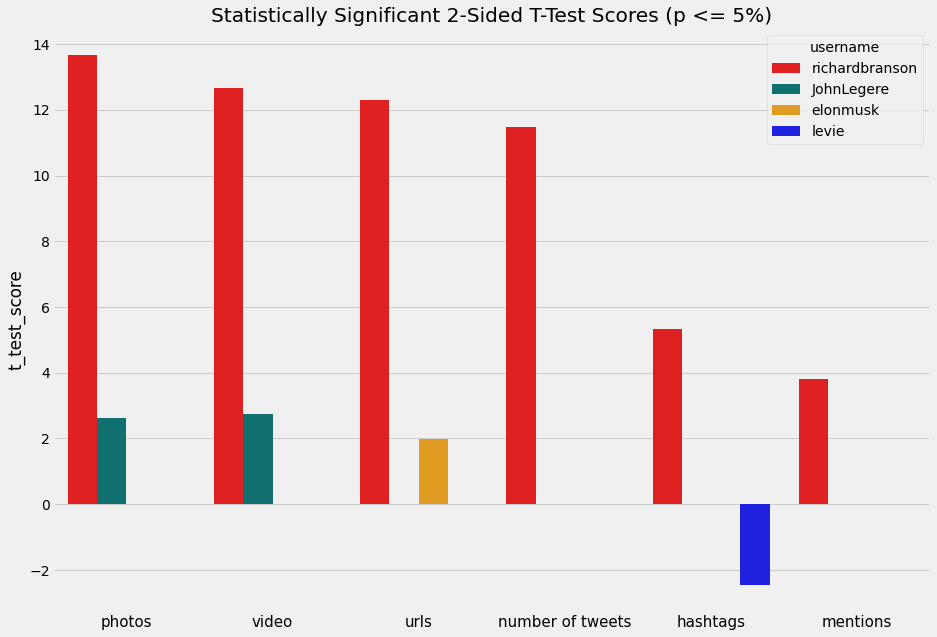

In [44]:
plt.figure(figsize=(14,10))
sns.barplot(data=sig_dif_t, x='feature', y='t_test_score', hue='username', palette=['red', 'teal', 'orange', 'blue', 'green'])
plt.title('Statistically Significant 2-Sided T-Test Scores (p <= 5%)')
plt.xlabel('')
plt.xticks(size=15)
plt.savefig('./figures/eda/stat_sig_t_tests.png', bbox_inches='tight', tranparent=True)
plt.show()

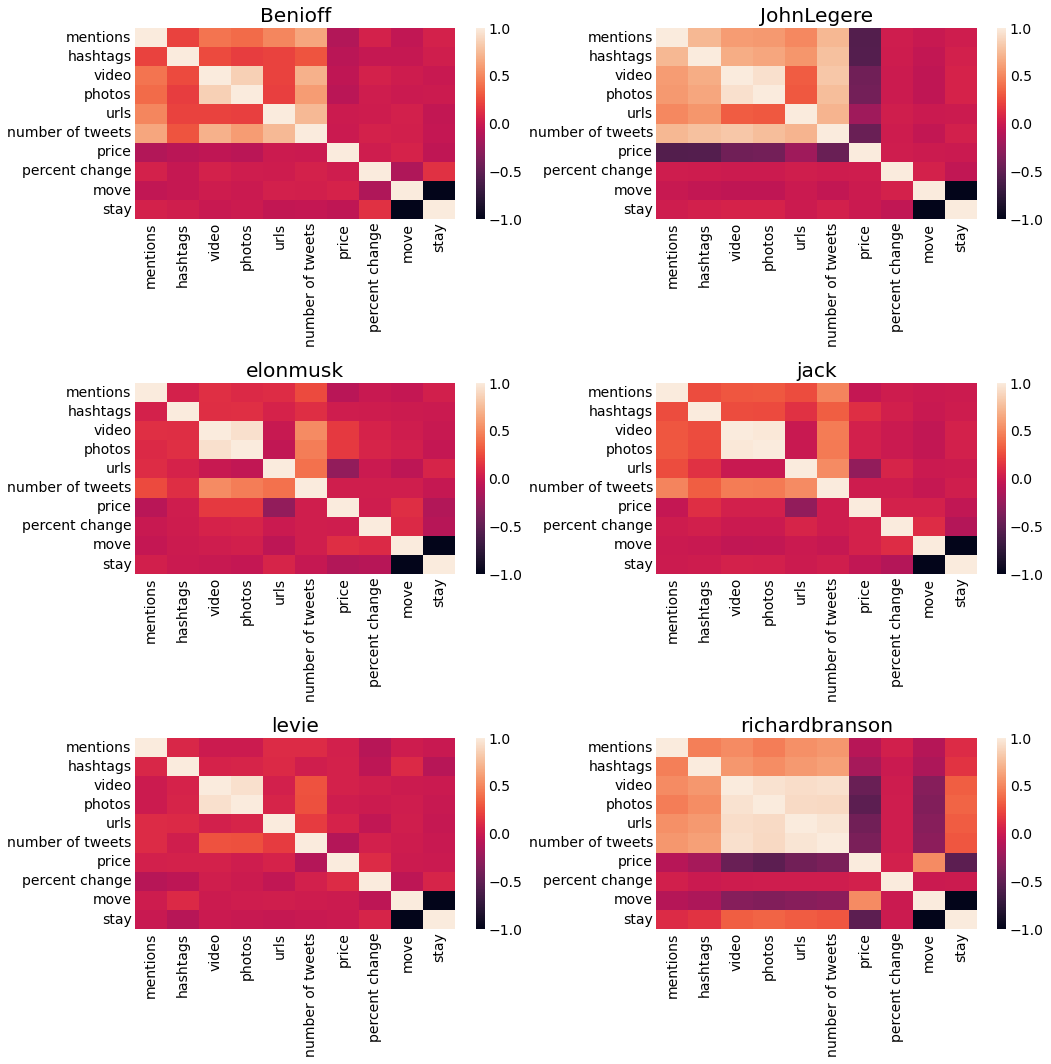

In [45]:
fig, axs = plt.subplots(3,2, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for i in range(6):
    df = tweet_stocks[tweet_stocks['username'] == mapper[i][0]].copy(deep=True)
    df['move'] = 0
    df['stay'] = 0
    df['move'][df['bins'] == 'move'] = 1
    df['stay'][df['bins'] == 'stay'] = 1
    sns.heatmap(data=df.corr('pearson'), ax=axs[i])
    axs[i].set_title('{}'.format(mapper[i][0]))
    plt.savefig('./figures/eda/{}_heatmap.png'.format(mapper[i][0], bbox_inches='tight', transparent=True))
plt.tight_layout()
plt.show()

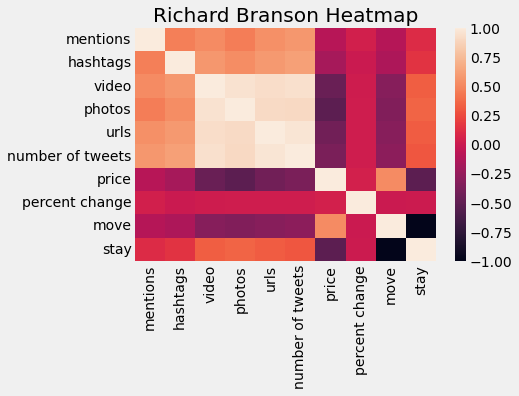

In [47]:


df = tweet_stocks[tweet_stocks['username'] == 'richardbranson'].copy(deep=True)
df['move'] = 0
df['stay'] = 0
df['move'][df['bins'] == 'move'] = 1
df['stay'][df['bins'] == 'stay'] = 1
sns.heatmap(data=df.corr('pearson'))
plt.title('Richard Branson Heatmap')
plt.savefig('./slides/figures/branson_heatmap.png', bbox_inches='tight', transparent=True)
plt.show()


In [52]:
tweet_stocks.to_pickle(f'./data/tweet_stocks_EDA.pkl')